In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib as plt

In [5]:
import matplotlib.pyplot as plt

In [6]:
from google.colab import files

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
nba_2020_per_game = files.upload()

Saving nba_2020_per_game.csv to nba_2020_per_game (1).csv


In [10]:
all_seasons = files.upload()

Saving all_seasons.csv to all_seasons (1).csv


**ASSIGNMENT #3 -- INSIGHTS FROM DATA VISUALIZATION AND STATISTICAL ANALYSIS**

In [11]:
df = pd.read_csv("nba_2020_per_game.csv")
# Create dataframe of NBA player data from 2019-2020 regular season
# .read_csv() function was returning a UnicodeDecodeError, so we had to specify encoding scheme
# Attributes were also separated by semi-colons, so we had to specify the delimiter

Objective:

*    What attributes have the strongest correlation to NBA players getting injured?

Research Questions:

*   What are the key attributes that contribute to NBA players being injury prone?
*   What can be done about these specific key attributes to help players avoid injury?

Approach:

*   This will be done by analyzing player statistics, position, injury history, among other relevant metrics.
*   Consider changing playing-time strategies, training, or even rules depending on the identified risk factors.







Data Structure Information:

*   Rk : Rank (Integer)
*   Player : Player's name (String)
*   Pos : Position (String)
*   Age : Player's age (Integer)
*   Tm : Team (String)
*   G : Games played (Integer)
*   GS : Games started (Integer)
*   MP : Minutes played per game (Float)
*   FG : Field goals per game (Float)
*   FGA : Field goal attempts per game (Float)
*   FG% : Field goal percentage (Float)
*   3P : 3-point field goals per game (Float)
*   3PA : 3-point field goal attempts per game (Float)
*   3P% : 3-point field goal percentage (Float)
*   2P : 2-point field goals per game (Float)
*   2PA : 2-point field goal attempts per game (Float)
*   2P% : 2-point field goal percentage (Float)
*   eFG% : Effective field goal percentage (Float)
*   FT : Free throws per game (Float)
*   FTA : Free throw attempts per game (Float)
*   FT% : Free throw percentage (Float)
*   ORB : Offensive rebounds per game (Float)
*   DRB : Defensive rebounds per game (Float)
*   TRB : Total rebounds per game (Float)
*   AST : Assists per game (Float)
*   STL : Steals per game (Float)
*   BLK : Blocks per game (Float)
*   TOV : Turnovers per game (Float)
*   PF : Personal fouls per game (Float)
*   PTS : Points per game (Float)


Data Types:

*   Float
*   Integer
*   String












In [12]:
print("\nBasic Statistics:")
df


Basic Statistics:


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,...,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,...,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,...,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,0.500,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,...,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,0.437,...,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
647,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,0.524,...,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
648,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,0.250,...,NaN,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
649,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,0.569,...,0.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


Descriptive Statistics Presentation:

In [13]:
# Specific columns that will be observed
selected_columns = ['Age', 'G', 'GS', 'MP', 'PF']
# We selected Age, Games played, Games started, Minutes played, Personal fouls, as we found them to be most relevant to answering our research questions

# Descriptive statistics
descriptive_stats_selected = df[selected_columns].describe()
print(descriptive_stats_selected)
# Used the .describe() function to summarize key statistical measures of our column data

              Age          G          GS          MP          PF
count  651.000000  651.00000  651.000000  651.000000  651.000000
mean    25.763441   38.21659   17.537634   19.179724    1.740092
std      4.024840   22.94443   23.022124    9.060972    0.819891
min     19.000000    1.00000    0.000000    1.000000    0.000000
25%     23.000000   15.50000    0.000000   12.000000    1.100000
50%     25.000000   41.00000    4.000000   18.500000    1.700000
75%     28.000000   59.00000   29.500000   26.700000    2.300000
max     43.000000   74.00000   73.000000   37.500000    5.000000


Data Visualization:

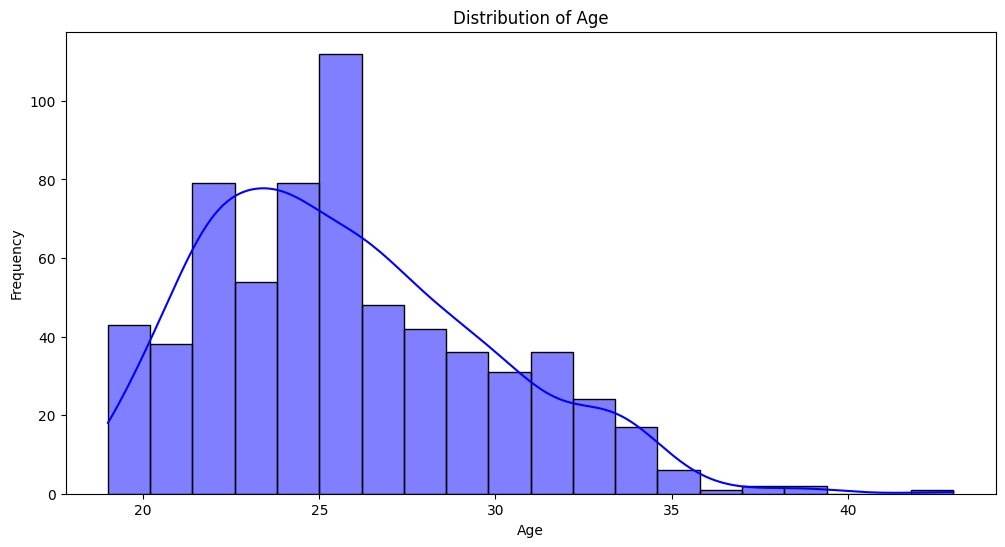

In [14]:
# Histogram for Distribution of Age
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='blue') # Since age is an integer value with a relatively small range in our dataset, we created one bin for each age
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Our goal of creating this histogram is to eventually identify trends in injury occurrence as they relate to player age
# For instance, it may reveal if injury rates tend to increase with age, or if specific age groups are prone to specific injury types
# Understanding the age of players that are most susceptible to certain injuries would allow training staff to take specialized preventative measures, such as adjusting training programs or rest-game protocols for each age group

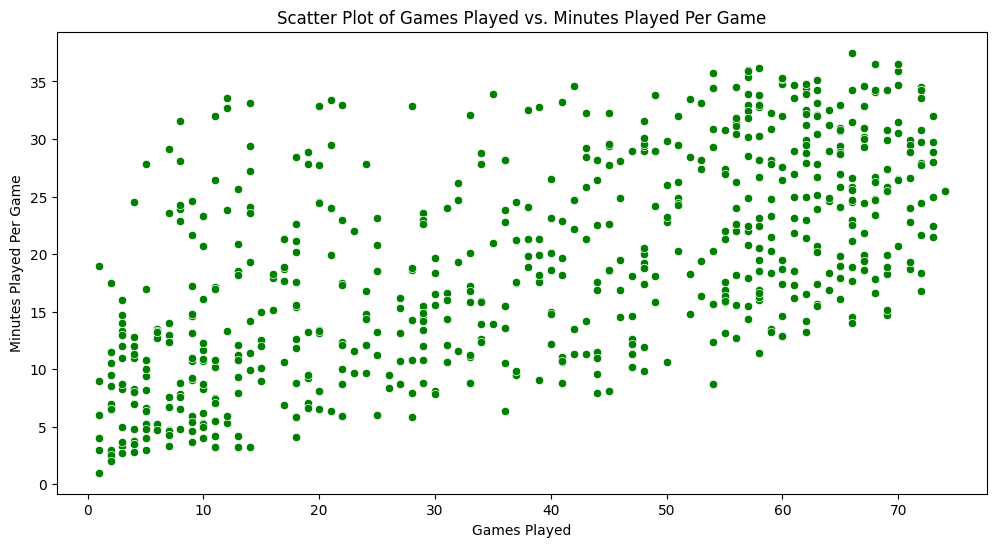

In [15]:
# Scatter plot for Games Played and Minutes Played Per Game
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['G'], y=df['MP'], color='green')
plt.title('Scatter Plot of Games Played vs. Minutes Played Per Game')
plt.xlabel('Games Played')
plt.ylabel('Minutes Played Per Game')
plt.show()
# Our goal of this scatterplot is to visualize the relationship that exists between minutes played and the number of games played by each player
# Through this, we can identify the players that consistently play high minutes per game as well as a large number of games, and consider them to be higher workload players
# Furthermore, these players are most likely to benefit from rest days and reduced playing time in order to maintain effective performance throughout the season and prevent injury due to fatigue

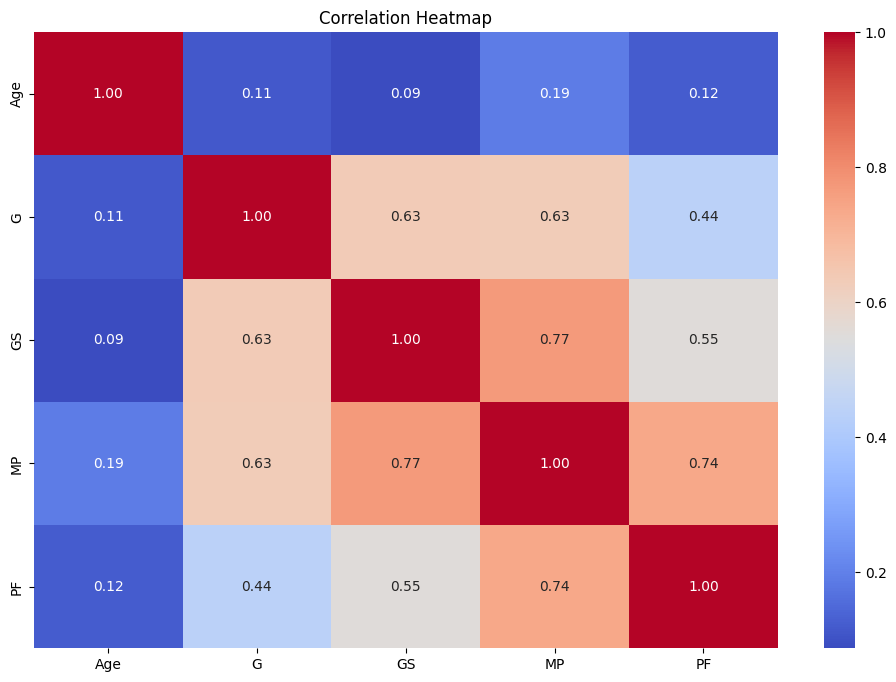

In [16]:
# Correlation Heatmap for aforementioned specific stats
correlation_matrix = df[['Age', 'G', 'GS', 'MP', 'PF']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # We used coolwarm colormap to more effectively visualize the magnitude of correlation
plt.title('Correlation Heatmap')
plt.show()
# Our goal of this correlation heatmap is to identify the significance of patterns between each attribute
# For instance, correlation between games started and minutes played can suggest that starters typically play more minutes, and ultimately that they are more susceptible to fatigue
# Furthermore, correlation between minutes played per game and personal fouls committed may also suggest that players who are more involved in the game are more prone to injury as a result of their playing style
# Additionally, a negative correlation between age and personal fouls committed could indicate that older players commit fewer fouls, and that it is not something that should be strongly considered when exploring injury trends by age

Challenges:

*   Initially, we had some trouble executing the .read_csv() function for our dataset, as we were not aware of the semi-colons acting as delimiters for each attribute. We discovered this quickly after opening the file in Excel. Additionally, implementing this check was rather straightforward

*  We also recevied a UnicodeDecodeError upon compilation, which none of us were familiar with. After some research, we were able to remedy this issue by declaring the appropriate encoding scheme for our dataset file


*   These difficulties aside, we were successfully able to create a variety of visualizations that provide meaningful insight of the relationships between our selected variables






Next Steps:


*   Going forward, we are eager to implement the pre-processing techniques that will be taught and demonstrated in the upcoming lectures

*   Through these, we will continue to gain valuable insight from our dataset that will help us answer our initial research questions with more confidence and substantiation

*   As much information as our dataset provides, I do, however, feel like we are somewhat limited in our ability to conclusively correlate the current attributes to injury. If possible, I would like to find attributes from other datasets from the same season that detail additional critical factors, such as the height and weight of players, along with their injury history







**ASSIGNMENT #4 -- DATA MANIPULATION AND PREPROCESSING**

Clean Data

In [17]:
df_height_weight = pd.read_csv("all_seasons.csv")
# Create another dataframe of NBA player information from all seasons

df_merged = pd.merge(df, df_height_weight[['player_name', 'player_height', 'player_weight']], left_on='Player', right_on='player_name', how='left')
# We then create a new dataset by merging the aforementioned two. The .merge() method will look at the 'player_name', 'player_height', and 'player_weight' columns from the all_seasons dataset
# Because the all_seasons dataset is much more comprehensive, the heights and weights will only be added to the player data if the corresponding player name exists in both datasets

df_sorted = df_merged.sort_values(by = ['Player', 'G'], ascending = [True, False])
# We also noticed that the player dataset had some duplicate rows due to mid-season trades. They would have a separate row for each team they played for, and a row for their season totals
# To effectively represent each player once, we first sorted the dataframe in alphabetical order of player name AND decreasing games played
# This is so that the first instance of a player will be the one with most games played. So if they were traded, this would be the row for their season totals, rather than one team

df_filtered = df_sorted.drop_duplicates(subset = ['Player'], keep='first')
# Then we dropped the rows with duplicate player names, keeping that first row with their season totals

df_filtered.rename(columns={'player_height': 'Height', 'player_weight': 'Weight'}, inplace=True)
# We then rename the player_height and player_weight columns so that they are consist with the rest of our column names

df_filtered.drop(columns=['player_name'], inplace=True)
# Finally we drop the redundant player_name column

missing_values = df_filtered.isnull().sum()
print(missing_values)

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        2
3P         0
3PA        0
3P%       27
2P         0
2PA        0
2P%        3
eFG%       2
FT         0
FTA        0
FT%       25
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Height    46
Weight    46
dtype: int64


<ipython-input-17-4cd6a5633503>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'player_height': 'Height', 'player_weight': 'Weight'}, inplace=True)
<ipython-input-17-4cd6a5633503>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['player_name'], inplace=True)


Handling Missing Values

In [18]:
df_filtered = df_filtered.copy()
# As standard practice we created a copy of the filtered player dataframe

df_filtered[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = df_filtered[['FG%', '3P%', '2P%', 'eFG%', 'FT%']].fillna(0.0)
# The above columns for shooting statistics have missing values in a handful of rows. We believe the most likely reason for this is if the player is a back-up, and simply did not take a free-throw or three-pointer during regular season
# With that in mind, we came to the conclusion that zero-filling would be the most appropriate method of imputation

df_filtered.dropna(subset = ['Height', 'Weight'], inplace=True)
# We also noticed an equal amount of missing values for the Height and Weight columns that were merged from the all_seasons dataframe
# One reason for this could be that the players existed in the regular season dataframe but not in the all_seasons dataframe. So at their rows, they do not have a corresponding height or weight value
# Because we would not be able to impute the missing player_name, we decided to drop these rows

df_filtered.drop(columns = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'eFG%', 'FT', 'FTA', 'TRB'], inplace=True)
# Given the relatively large number of columns in our dataset, we were concerned that our eventual machine learning model would become overfitted due to the volume of the feature space
# To mitigate this risk we wanted to maintain only the most relevant features in our dataset
# As a result, we dropped FG, FGA, 3P, 3PA, 2P, 2PA, FT, FTA. Since FG% is the ratio of FG to FGA, the FG and FGA information is already encapsulated. This same logic applies to 3P%, 2P%, and FT% as well
# Keeping FG and FGA in addition to FG% would not add much value, and if anything, could add unnecessary complexity to the model
# For likewise reasons, we dropped TRB since it is simply the sum of ORB and DRB. We also dropped eFG% since it is FG% with weight added to 3P

updated_missing = df_filtered.isnull().sum()
print(updated_missing)
# As seen below, these imputation methods effectively handled all the missing values in our dataframe

Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG%       0
3P%       0
2P%       0
FT%       0
ORB       0
DRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Height    0
Weight    0
dtype: int64


Feature Value Transformation

In [19]:
df_filtered

,Player,Pos,Age,Tm,G,GS,MP,FG%,3P%,2P%,...,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Height,Weight
1619,Aaron Gordon,PF,24,ORL,62,62,32.5,0.437,0.308,0.494,...,1.7,5.9,3.7,0.8,0.6,1.6,2.0,14.4,205.74,99.790240
2029,Aaron Holiday,PG,23,IND,66,33,24.5,0.414,0.394,0.427,...,0.3,2.0,3.4,0.8,0.2,1.3,1.8,9.5,185.42,83.914520
3127,Abdel Nader,SF,26,OKC,55,6,15.8,0.468,0.375,0.556,...,0.3,1.6,0.7,0.4,0.4,0.8,1.4,6.3,198.12,104.326160
3004,Adam Mokoka,SG,21,CHI,11,0,10.2,0.429,0.400,0.462,...,0.6,0.3,0.4,0.4,0.0,0.2,1.5,2.9,195.58,86.182480
3654,Admiral Schofield,SF,22,WAS,33,2,11.2,0.380,0.311,0.516,...,0.2,1.2,0.5,0.2,0.1,0.2,1.5,3.0,195.58,109.315672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,Zach Collins,PF,22,POR,11,11,26.4,0.471,0.368,0.510,...,2.3,4.0,1.5,0.5,0.5,1.3,3.3,7.0,213.36,104.326160
2573,Zach LaVine,SG,24,CHI,60,60,34.8,0.450,0.380,0.497,...,0.7,4.1,4.2,1.5,0.5,3.4,2.2,25.5,195.58,83.007336
3753,Zhaire Smith,SG,20,PHI,7,0,4.6,0.273,0.000,0.375,...,0.0,0.3,0.3,0.4,0.0,0.3,0.6,1.1,193.04,90.264808
4281,Zion Williamson,PF,19,NOP,24,24,27.8,0.583,0.429,0.590,...,2.7,3.6,2.1,0.7,0.4,2.5,1.8,22.5,198.12,128.820128


In [20]:
# Now, we want to convert the columns values for team and position from string to integer so that they can be incorporated in the fitting of our machine learning model
# These attributes have the potential to add significant value to our model training and could offer key insights in predicting a player's injury risk
# We first create reate label encoder objects for each of the aforementioned columns
label_encoder_tm = LabelEncoder()
label_encoder_pos = LabelEncoder()

# Encode 'Tm' and 'Pos' columns
df_filtered['Tm_encoded'] = label_encoder_tm.fit_transform(df_filtered['Tm'])
df_filtered['Pos_encoded'] = label_encoder_pos.fit_transform(df_filtered['Pos'])
# Now each unique categorical value in the 'Tm' and 'Pos' columns will be replaced by a corresponding integer value

# Get the index positions of the original columns
tm_index = df_filtered.columns.get_loc('Tm')
pos_index = df_filtered.columns.get_loc('Pos')

# Insert the encoded columns next to the original columns
df_filtered.insert(tm_index + 1, 'Tm_encoded', df_filtered.pop('Tm_encoded'))
df_filtered.insert(pos_index + 1, 'Pos_encoded', df_filtered.pop('Pos_encoded'))
# We decided to create separate columns for the encoded values so that the original string values could be conveniently referenced
# It is also worth noting that there is no need to apply z-score normalization to these encoded values, as the numerical values assigned to each category are arbitrary and are not related to any sort of scale
# Applying scaling techniques in this case could actually lead to unintended consequences when being handled by a machine learning algorithm

# Print the DataFrame after transformations
print(df_filtered.head(10))  # Print the first 10 rows

                 Player Pos  Pos_encoded  Age   Tm  Tm_encoded   G  GS    MP  \
1619       Aaron Gordon  PF            2   24  ORL          21  62  62  32.5   
2029      Aaron Holiday  PG            4   23  IND          11  66  33  24.5   
3127        Abdel Nader  SF            5   26  OKC          20  55   6  15.8   
3004        Adam Mokoka  SG            8   21  CHI           3  11   0  10.2   
3654  Admiral Schofield  SF            5   22  WAS          30  33   2  11.2   
2080         Al Horford   C            0   33  PHI          22  67  61  30.2   
51      Al-Farouq Aminu  PF            2   29  ORL          21  18   2  21.1   
650          Alec Burks  SG            8   28  TOT          28  66  19  26.6   
819         Alex Caruso  PG            4   25  LAL          13  64   2  18.4   
2611           Alex Len   C            0   26  TOT          28  55  12  17.6   

        FG%  ...  ORB  DRB  AST  STL  BLK  TOV   PF   PTS  Height      Weight  
1619  0.437  ...  1.7  5.9  3.7  0.8  0

In [21]:
injuries_2010_2020 = files.upload()
# We upload this dataset, which contains the injury history of all NBA players from 2010-2020

Saving injuries_2010-2020.csv to injuries_2010-2020 (1).csv


In [22]:
df_injuries = pd.read_csv("injuries_2010-2020.csv")

injured_players = set(df_injuries["Acquired"].unique()).union(set(df_injuries["Relinquished"].unique()))
# For whatever reason, the names of the injured players in our dataframe are split between two columns, "Acquired" and "Relinquished"
# To create a unique list of all the players who have been injured, we created a set for the names in each column and then used the .union() method

# We now create a function to count the number of times a player has been injured
def count_injuries(df):
    player_injury_count = {}

    # Iterating over the injuries DataFrame
    for _, row in df_injuries.iterrows():
        player = row["Relinquished"]  # "Relinquished", in this dataset, indicates player being placed on IR , so we want to add to their injury count each time that they appear
        if pd.notna(player):
            if player in player_injury_count:
                player_injury_count[player] += 1
            else:
                player_injury_count[player] = 1

    # Create a new column indicating the number of times each player has been injured
    df_filtered['Injury Count'] = df_filtered['Player'].map(player_injury_count).fillna(0)

# Calling this function will create a new column in our filtered dataframe called "Injury Count", applying the count_injuries function,, which effectively maps the injury count to the corresponding player name
count_injuries(df_filtered)

# We will also use this function to check if the name of each player in our filtered dataframe appears in the set of players who have been injured
def check_injured(player_name):
  if player_name in injured_players:
      return "Yes"
  else:
      return "No"

df_filtered["Injured"] = df_filtered["Player"].apply(check_injured)
# Creates a new column in our filtered dataframe called "Injured", applying the check_injured function to each value of the "Player" column
# If the name in the "Player" column appears in the set of injured players, the function will return "Yes" that they have been injured, else "No"

print(df_filtered.columns)
# As seen below, the new columns have been successfully created

Index(['Player', 'Pos', 'Pos_encoded', 'Age', 'Tm', 'Tm_encoded', 'G', 'GS',
       'MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Height', 'Weight', 'Injury Count', 'Injured'],
      dtype='object')


In [23]:
# Now that we have performed the rudimentary data cleaning operations, and have incorporated the features for player height, player weight, and injury history, we can create a copy dataframe
# This will be for our eventual SHAP models, as we do not want to utilize data that has been scaled
df_shap = df_filtered.copy()

In [24]:
# Select the columns to transform
columns_to_zscore = ['Age', 'G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Height', 'Weight' ]

# Initialize StandardScaler for standardization
scaler_standard = StandardScaler()

# Apply standardization (z-score) transformation
df_filtered[columns_to_zscore] = scaler_standard.fit_transform(df_filtered[columns_to_zscore])
# By z-scoring these columns, we are centering the data around its mean and scaling it to have a consistent standard deviation, which can be beneficial for our machine learning algorithms
# The selected columns represent quantitative measurements where the relative difference between values are meaningful
# Furthermore, given the variety that exists in these metrics throughout our dataset, we can better identify the outliers
# For the purposes of our research, this could be the players who play significantly more games or minutes compared to the average player, which could contribute to their risk of injury

Achievement & Fun Part



*   As challenging as it was, merging the values from the height and weight columns of the all_seasons dataset and having the values correspond with the correct player name in the original dataframe was fun to achieve

*  We were also successful in not only identifying where the missing values were in our dataframe, but also in imputing them

* This process required us to think more critically about our dataset, and to estimate what the reason could be for the missing values

* Furthermore, the proper imputation techniques, whether it be zero-filling, or simply dropping the row, had to be applied thoughtfully and carefully








Challenges



*   The biggest challenge in this assignent was handling the missing values

*   Identifying how many missing values we had and where they existed was a relatively straightforward process, but for some reason, using the .fillna(0.0) method with 'inplace = True' caused the missing values to return 'None' rather than the desired '0.0'

*   To remedy this, we instead modified the dataframe at the columns with the missing shooting statistics using .fillna(0.0), and assigned that to the original dataframe at the same columns

*   Another challenge we had was merging the height and weight columns from a separate dataframe to the original dataframe. Furthermore, only merging the height and weight values if the player exists in the original dataframe










Next Steps



*   In regards to our research process, we have found a dataset detailing the injury history of NBA players from the 2010-2020 seasons. Our next step will be to quantify the number and possibly even the type of injuries for each player in that dataset

*   Then, if the player name exists in our 2019-2020 regular season dataset, we can create an injury history column and merge the information accordingly

*   We believe that finding a way to properly represent this data will be very beneficial to the accuracy of our eventual model, and better help us answer the guiding question of our research

*   As we continue to prepare by cleaning and preprocessing our data, we are eager to explore the techniques that will be taught in future lectures






**ASSIGNMENT #5 -- DEVELOPING FIRST MACHINE LEARNING MODEL**

Define the classification problem: What is your predictor, and why is it important?

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
X = df_filtered.drop("Injured", axis = 1)
y = df_filtered["Injured"]
# X will be our filtered dataframe EXCLUDING the "Injured" column, and will be the attributes of the players used to make the prediction
# y will be the JUST the "Injured" column of our dataframe, as this is the target variable we are trying to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Split the attributes and target variable into training and testing sets
# It also very important to note that the columns within X_train and X_test do not need to having Standard Scaling applied to them, as we already z-scored the desired columns

# We now select only numeric columns from X_train and X_test so that the machine learning model can be trained without issue
# This effectively excludes the player name column (which is insignificant to our model training), as well as the non-encoded team name and player position columns
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

In [27]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}
# We now define the three classifiers to use

Training and evaluating Random Forest
Accuracy of Random Forest: 1.00


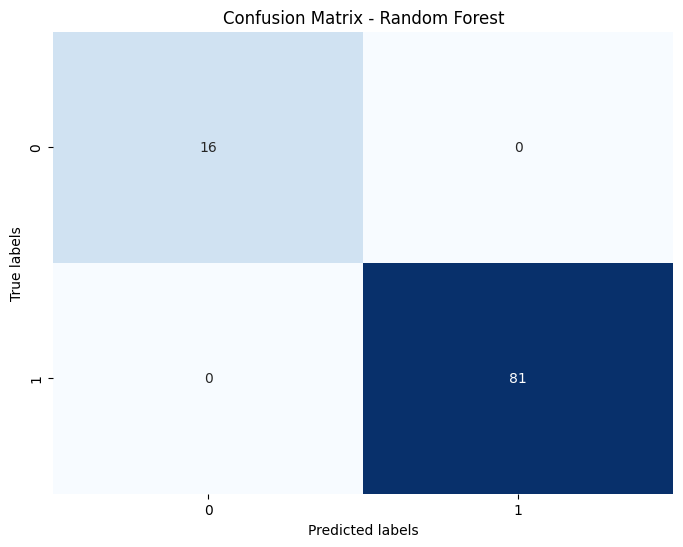

Training and evaluating Logistic Regression
Accuracy of Logistic Regression: 1.00


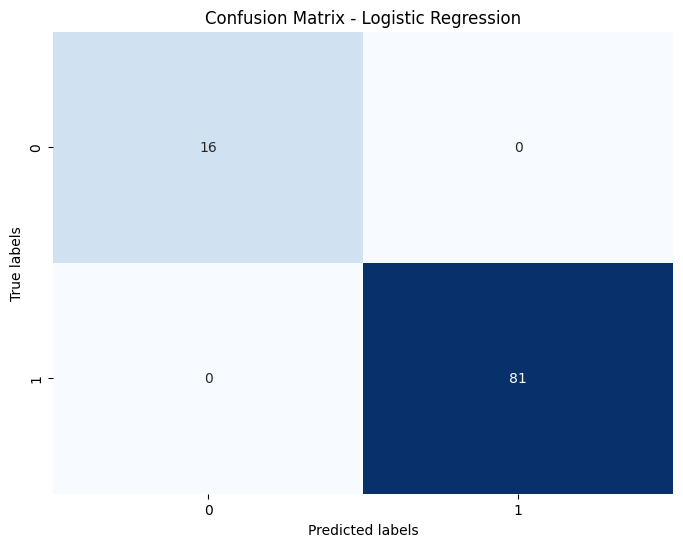

Training and evaluating Support Vector Classifier
Accuracy of Support Vector Classifier: 0.87


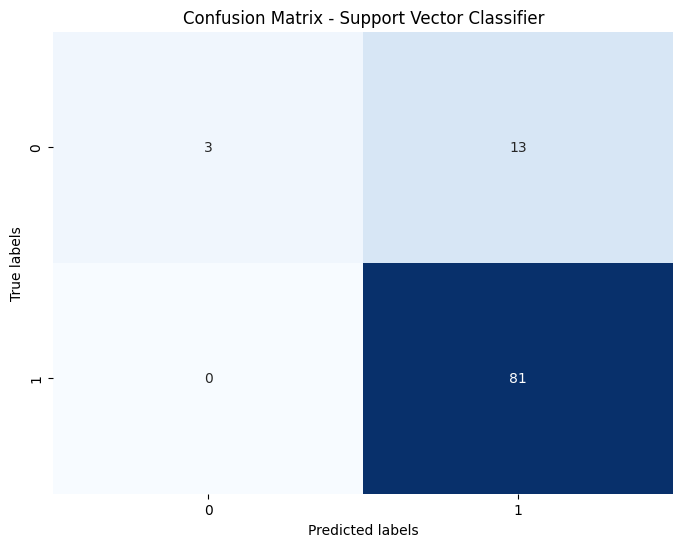

Training and evaluating K-Nearest Neighbors
Accuracy of K-Nearest Neighbors: 0.88


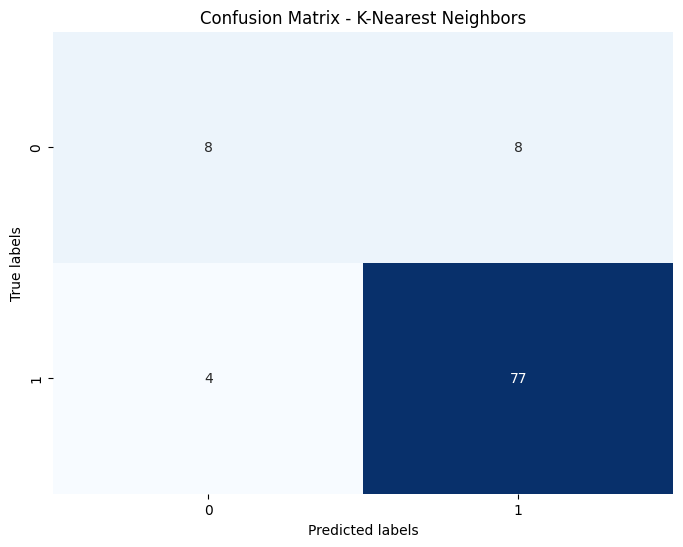

In [28]:
# Define a function to train a model, predict, and print accuracy with confusion matrix
def train_and_evaluate_model(model, model_name):
    # Fit the model to the training data
    model.fit(X_train_numeric, y_train)

    # Predict the target variable for the test data
    y_pred = model.predict(X_test_numeric)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Train and evaluate each model
for model_name, model in classifiers.items():
    print(f"Training and evaluating {model_name}")
    train_and_evaluate_model(model, model_name)

# For each of the four classifiers, we loop through the training and testing data
# We then train the classifier using the training data, and create a prediction for our target variable using the test data
# Finally we compare the accuracy of our prediction to the test data for our target variable

Report which classifier provided the best model, and discuss how your scaling approaches influenced the performance.



*   Based on the above results, the Logistic Regression classifier provided the best model

*   The Standard Scaler achieved an accuracy of 85.57%, and the MinMax Scaler achieved an accuracy of 83.51%, both of which are the highest for a given classifier

*   Standard Scaler standardizes the attribute values relative to their mean, which leads to less influence from outliers, and better preserves the distribution shape

*   MinMax Scaler standardizes the attribute values on a scale between 0 and 1, more effectively preserving the original range of data, but is sensitive to extreme outliers

*   While there is slight improvement in accuracy of the Standard Scaler compared to the MinMax Scaler, the values are close, meaning we cannot confidently conclude that the scaling method significantly impacts the performance of our machine learning model

Achievement & Fun Part



*   We were successful in determining our target variable, as well as splitting our dataframe into training and testing sets

*   Through the use of scikit-learn models, we successfully applied Standard Scaling along with MinMax Scaling to the training and testing sets of our player attribute data

*   Furthermore, we implemented three different classifiers to train our machine learning models with, ultimately allowing us to compare their accuracies

*   Being able to utilize our data to train a machine learning model through different classifiers and scaling approaches was not only a very fun process, but also informative when done successfully





Challenges





*   One challenge we faced was creating the column in our dataframe that indicates whether or not the player had been injured before

*   The dataset we found for injury history was much more comprehensive, including information from the 2019-2020 season and the 9 seasons prior. Additionally, the names of the players that had been injured were split between two columns

* Remedying this required a bit of additional research, as we had to figure out how to take the unique names from each column and merge them into a single list

* With that single list, we were able to compare the names of the injured
players to the names that existed in our filtered dataframe, and indicate whether or not they had been injured before

* Another challenged we faced was scaling the player attribute data for both the training and testing sets, as some of the columns included non-numerical data, such as the player names

* To remedy this, we had to create a list of the attribute columns that strictly contained numerical data, and apply our Standard and MinMax Scaling at those columns only





Next Steps



*   In regards to our research, we are quite satisfied with the attributes we have been able to include from other datasets, such as the player height and weight, as well as if they have been injured before

*  We look forward to utilizing the skills and information that will be taught in upcoming lectures to explore the accuracy of our machine learning models, along with the signifiance of each approach

*  Additionally, we are eager to discover how our machine learning models could be refined, and what further techniques could be implemented to improve its ability to answer our guiding research question




**DISCUSSION: CROSS-VALIDATION AND OPTIMIZATION**

In [29]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report

In [30]:
# We first begin by defining our cross-validation model
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
# n_splits indicates the number of folds in the cross-validation process. Essentially, this is splitting the dataset into 5 parts, where one will be used for testing, and the remaining parts are used for testing
# These cross-validation process then iterates through these folds, allowing each of the 5 parts to be used for testing
# Furthermore, n_repeats denotes the numer of times this entire cross-validation process will be repeated. With each repetition, the data points will be shuffled, allowing for different testing and training splits

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}, # For Random Forest, we can define the number of trees, as well as the maximum depth of each tree to be tested
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]}, # For Logistic Regression, we can define the inverse of regularization strength. Therefore, smaller value signifies stronger regularization being applied to the model
    'Support Vector Classifier': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}, # For SVC, the penalty parameter defines the trade-off between maximizing the margin and minimizing classification error
                                                                                  # A smaller c allows for more misclassification but simpler decision boundary. Larger c minimizes misclasffication but more complex decision boundary that could lead to overfitting
                                                                                  # The kernel coefficient defines how much influence a single training simple will have. Smaller gamma means larger radius of similarity, so it can prevent overfitting but make the model less accurate
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7, 9]} # For K-Nearest Neighbors, we can define a different number of neighbors to be tested
}

In [31]:
# Performing cross-validation produced complications, specifically in the y label that we are trying to predict, since it is a binary output in the form of a string.
# We can simply remedy this by encoding the y label of the testing and training sets. The string "Yes" will be represented through 1, and the string "No" will be represented through 0
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

Classifier: Random Forest
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Best parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy on test set: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        81

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



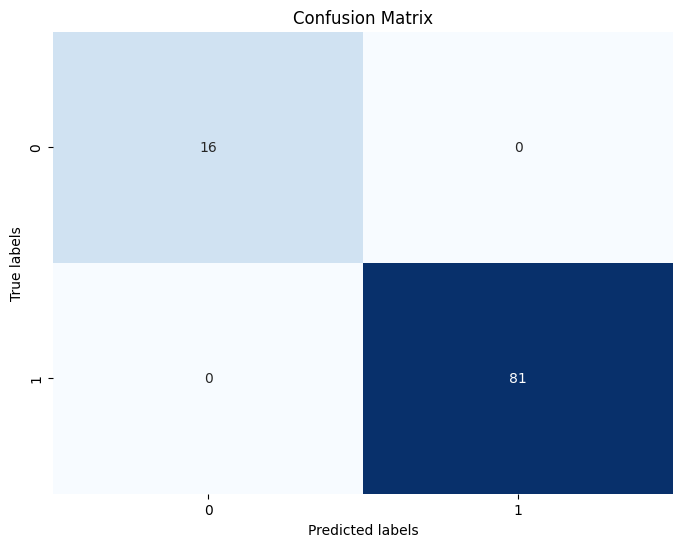

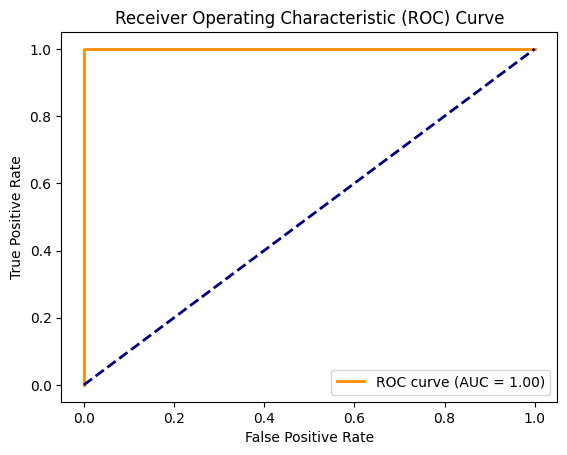

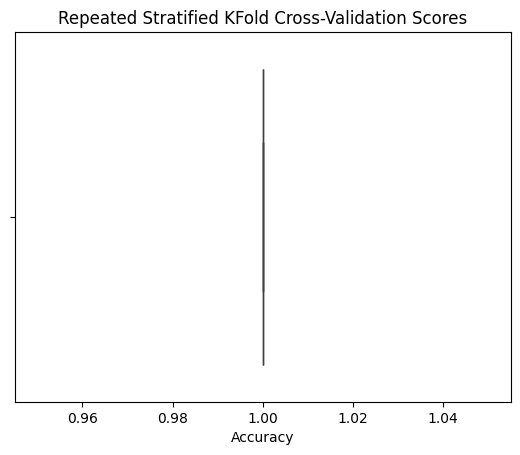

Classifier: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [1.         1.         0.98701299 1.         0.98701299 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'C': 10}
Accuracy on test set: 1.0
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        81

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



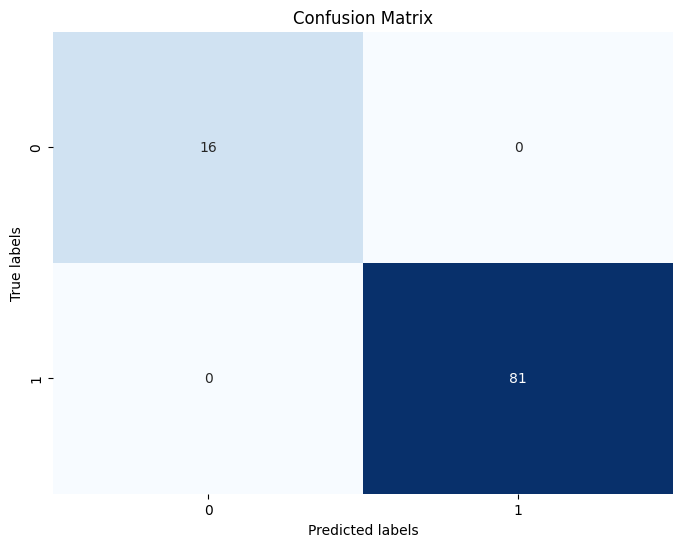

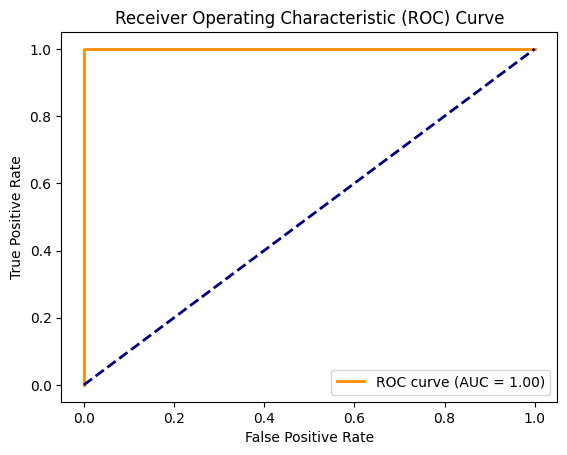

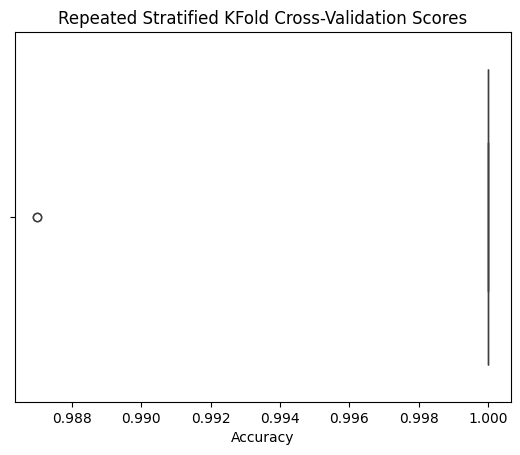

Classifier: Support Vector Classifier
Cross-validation scores: [0.83333333 0.87012987 0.83116883 0.83116883 0.84415584 0.83333333
 0.88311688 0.87012987 0.83116883 0.84415584 0.83333333 0.88311688
 0.83116883 0.83116883 0.84415584]
Best parameters: {'C': 10, 'gamma': 'scale'}
Accuracy on test set: 0.9690721649484536
Classification report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.96      0.98        81

    accuracy                           0.97        97
   macro avg       0.92      0.98      0.95        97
weighted avg       0.97      0.97      0.97        97



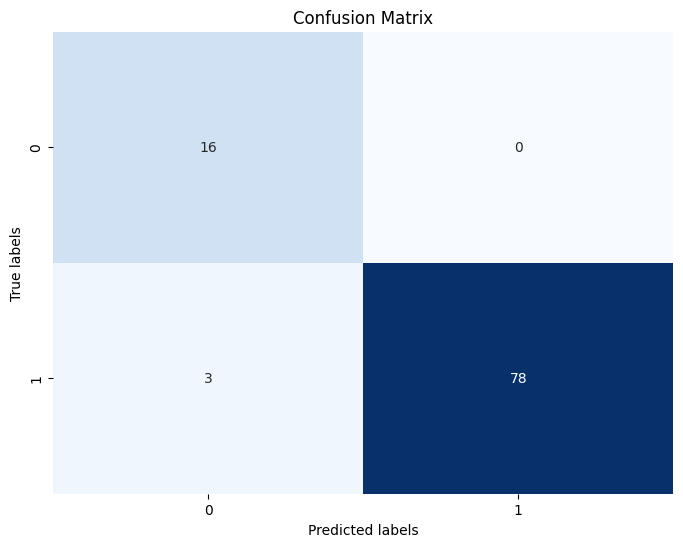

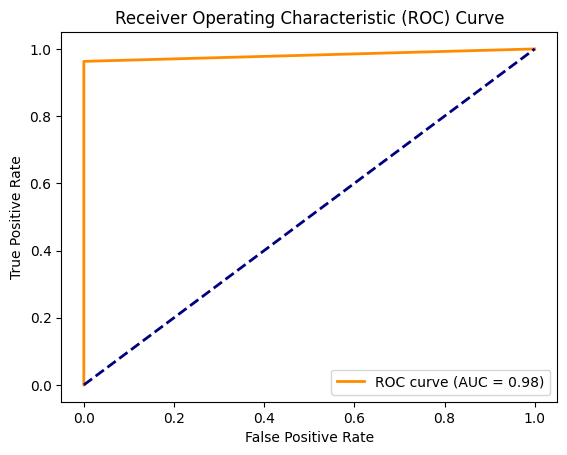

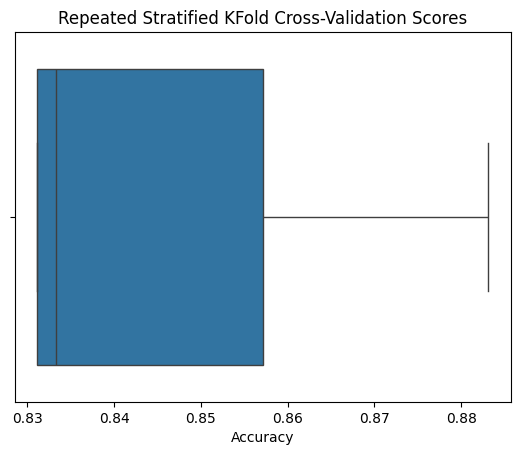

Classifier: K-Nearest Neighbors
Cross-validation scores: [0.88461538 0.88311688 0.8961039  0.88311688 0.88311688 0.87179487
 0.8961039  0.83116883 0.87012987 0.90909091 0.88461538 0.85714286
 0.87012987 0.85714286 0.8961039 ]
Best parameters: {'n_neighbors': 3}
Accuracy on test set: 0.865979381443299
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.44      0.52        16
           1       0.90      0.95      0.92        81

    accuracy                           0.87        97
   macro avg       0.77      0.69      0.72        97
weighted avg       0.85      0.87      0.86        97



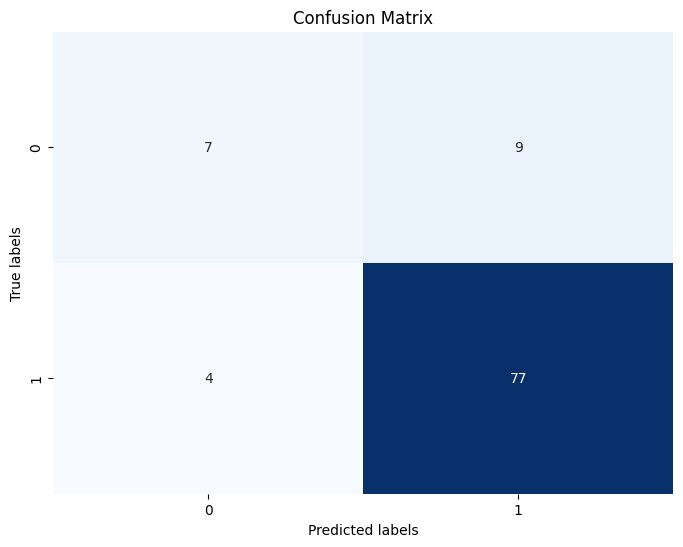

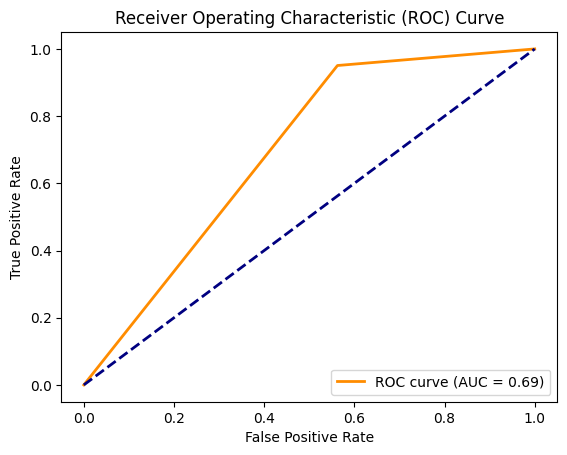

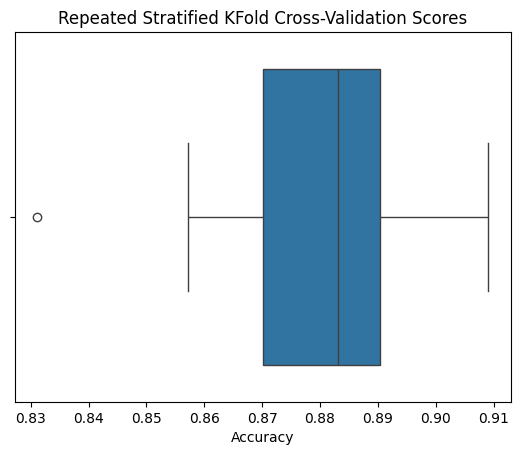

In [32]:
# Perform cross-validation, optimization, and evaluation by iterating through each classifier
for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")

    # Perform cross-validation for each hyper-parameterized classifier, utilizing our X and y training sets. The performance of each classifier will be evaluated based on its accuracy, hence scoring parameter
    cv_scores = cross_val_score(clf, X_train_numeric, y_train_encoded, cv=cv_method, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")

    # GridSearchCV exhaustively searches through all of the combinations of hyperparameters detailed in 'param_grid'. During this, each combination of hyperparameters for each classifier is fitted to the training data
    # The performance of each combination is evaluated based on the scoring metric we defined, in this case accuracy
    # After evaluating, best_params_ will provide the best combination of parameters that produced the highest average accuracy across all folds of cross-validation for each classifier
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[clf_name], cv=cv_method, scoring='accuracy')
    grid_search.fit(X_train_numeric, y_train_encoded)
    best_params = grid_search.best_params_
    print(f"Best parameters: {best_params}")

    # Now, we train the model with best parameters, utilizing the X and y training sets
    clf_best = clf.set_params(**best_params)
    clf_best.fit(X_train_numeric, y_train_encoded)

    # Predict y label output from X_test set
    y_pred = clf_best.predict(X_test_numeric)

    # Print the accuracy by comparing the y test set to the predicted y
    # Also print the classification report
    print(f"Accuracy on test set: {accuracy_score(y_test_encoded, y_pred)}")
    print(f"Classification report:\n{classification_report(y_test_encoded, y_pred)}")

    # Generate a confusion matrix for each classifier. These can not only be compared to each other, but also the previous confusion matrices before performing cross-validation and optimizing our classifier parameters
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Generate an ROC curve for each optimized classifier using the true positive rate and false positive rate
    # The true positive rate measures the proportion of actual positive instance that are correctly predicted positive (In our instance, a player that has been injured before being correctly predicted as injured)
    # The false positive rate measures the proportion of actual negative instances that are incorrectly predicted as positive (In our instance, a player that has not been injured before being predicted as injured)
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Finally, we can visualize the repeated stratified KFold Cross-Validation scores
    # For each classifier, utilizing the parameters that return the highest accuracies on average, this is depicting the accuracy from each of the 5 folds, repeated 3 times, hence the 15 different accuracy scores
    # This gives us a box-and-whisker plot of the accuracies of each run allowing us to clearly see the range, median, as well as the interquartile range
    sns.boxplot(x=cv_scores)
    plt.xlabel('Accuracy')
    plt.title('Repeated Stratified KFold Cross-Validation Scores')
    plt.show()

In [71]:
# Access the confusion matrix for KNN classifier
knn_cm = confusion_matrix(y_test_encoded, y_pred)

# Identify the index for the actual negative class and the predicted positive class
false_positive_index = 1  # Column index for predicted positive class
actual_negative_index = 0  # Row index for actual negative class

# Extract the number of false positives from the confusion matrix
false_positives = knn_cm[actual_negative_index, false_positive_index]

print("Number of false positives:", false_positives)
# For verification, number should match the number of false positives in the KNN confusion matrix, which it does

Number of false positives: 9


In [77]:
# Find indices of false positive instances
false_positive_indices = np.where((y_pred == 1) & (y_test_encoded == 0))[0]

# Extract corresponding data points (rows) from feature dataset
false_positive_data_points = df_filtered.iloc[false_positive_indices]

print("False positive data points (Player column):")
print(false_positive_data_points["Player"])
# The false positives would be the players that are predicted to have been injured, their measurables and statistics point towards them being an injured player, but in reality they have never been
# Identifying the names of these players is crucial in fulfilling the aim of our research, preventing NBA player injuries. These players can be honed in on, and their playing time and workouts can be handled with more caution

False positive data points (Player column):
2029        Aaron Holiday
947           Amir Coffey
3499       Andre Roberson
3431         Bobby Portis
475               Bol Bol
3279           Cedi Osman
1238        Cheick Diallo
533          Corey Brewer
2934    De'Anthony Melton
Name: Player, dtype: object


**DISCUSSION: ENHANCING PREDICTIVE PERFORMANCE**

**DISCUSSION: EXPLORING EXPLAINABLE AI METHODS**

In [33]:
!pip install shap

In [34]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [35]:
# Recall the dataframe created earlier, after performing basic data cleaning operations and before transformations were applied to any features
df_shap.head()

,Player,Pos,Pos_encoded,Age,Tm,Tm_encoded,G,GS,MP,FG%,...,AST,STL,BLK,TOV,PF,PTS,Height,Weight,Injury Count,Injured
1619,Aaron Gordon,PF,2,24,ORL,21,62,62,32.5,0.437,...,3.7,0.8,0.6,1.6,2.0,14.4,205.74,99.790240,26.0,Yes
2029,Aaron Holiday,PG,4,23,IND,11,66,33,24.5,0.414,...,3.4,0.8,0.2,1.3,1.8,9.5,185.42,83.914520,0.0,No
3127,Abdel Nader,SF,5,26,OKC,20,55,6,15.8,0.468,...,0.7,0.4,0.4,0.8,1.4,6.3,198.12,104.326160,6.0,Yes
3004,Adam Mokoka,SG,8,21,CHI,3,11,0,10.2,0.429,...,0.4,0.4,0.0,0.2,1.5,2.9,195.58,86.182480,3.0,Yes
3654,Admiral Schofield,SF,5,22,WAS,30,33,2,11.2,0.380,...,0.5,0.2,0.1,0.2,1.5,3.0,195.58,109.315672,0.0,No


In [36]:
# Remove unneeded features, in this case, columns where features are strings
# We will hold off on removing the injured column, as it will serve as our label to be predicted
df_shap = df_shap.drop(columns = ["Player", "Pos", "Tm"])

In [60]:
# Split the label to be predicted
X_shap = df_shap.drop(columns = "Injured")
y_shap = df_shap["Injured"]

In [61]:
# We will use 20% of the data as a test dataset
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap , test_size=0.2)

In [62]:
# Fitting to the XGBClassifier produced a ValueError since the y label that we are trying to predict is a binary output in the form of a string
# We can remedy this by encoding the y label of the testing and training sets. The string "Yes" will be 1, and the string "No" will be 0
label_encoder = LabelEncoder()
y_test_shap_encoded = label_encoder.fit_transform(y_test_shap)
y_train_shap_encoded = label_encoder.fit_transform(y_train_shap)

In [63]:
# Next use SMOTE to balance each class in the dataset
sm = SMOTE(random_state = 3, sampling_strategy = "not majority")
X_train_shap, y_train_shap_encoded = sm.fit_resample(X_train_shap, y_train_shap_encoded)

# Get the name of the feature in the dataset and assign it to the changed training dataset
features = X_test_shap.columns
X_train_shap.columns = features

In [64]:
# Generate model
model = XGBClassifier()

# Fit the data to the model
model.fit(X_train_shap, y_train_shap_encoded)

# Generate the results by predicting the label from test data
y_pred_shap = model.predict(X_test_shap)
result = classification_report(y_test_shap_encoded, y_pred_shap)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        79

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97



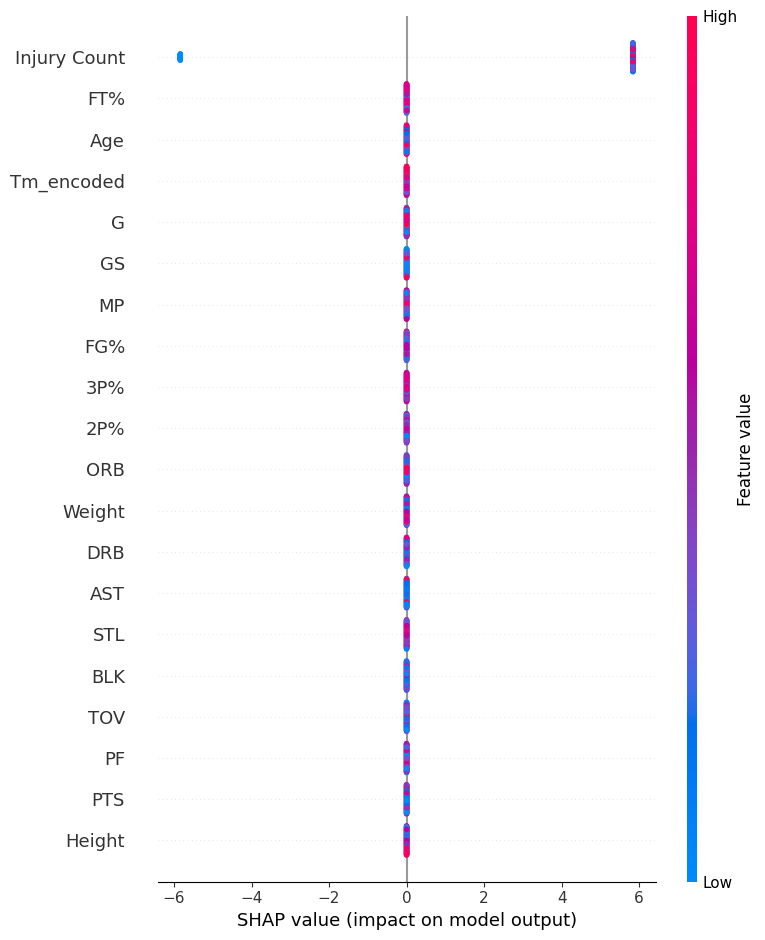

In [65]:
# Analysis of the model using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_shap)

# Generate results graph
shap.summary_plot(shap_values, X_test_shap)

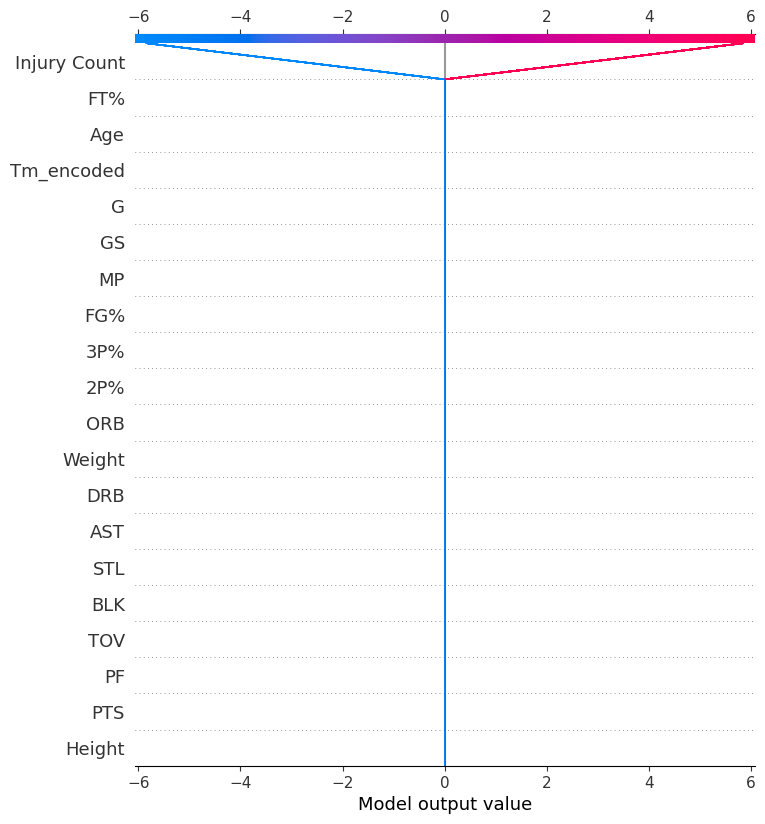

In [66]:
# Generate SHAP decision_plot
shap.decision_plot(explainer.expected_value, shap_values, X_test_shap, ignore_warnings = True)

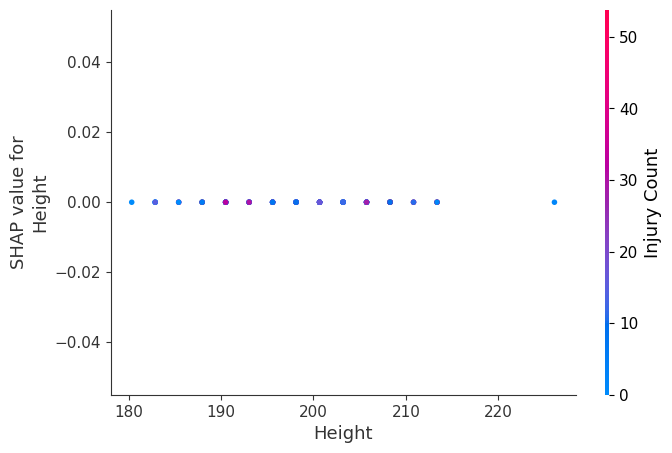

In [68]:
# Now we can check correlation between features
# Check correlation between height and injury count
shap.dependence_plot("Height", shap_values, X_test_shap, interaction_index = "Injury Count")

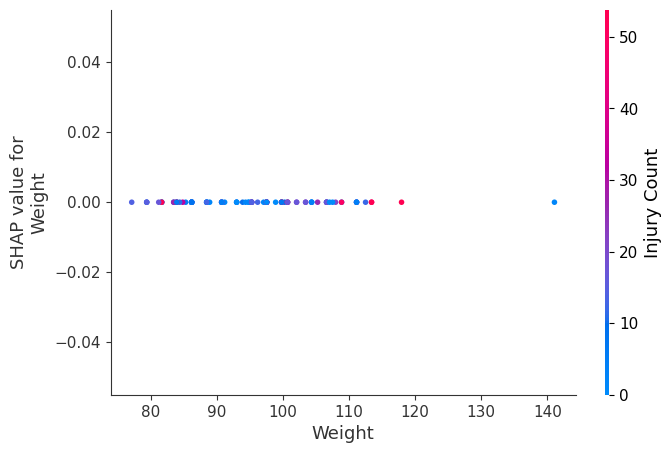

In [69]:
# Check correlation between weight and injury count
shap.dependence_plot("Weight", shap_values, X_test_shap, interaction_index = "Injury Count")

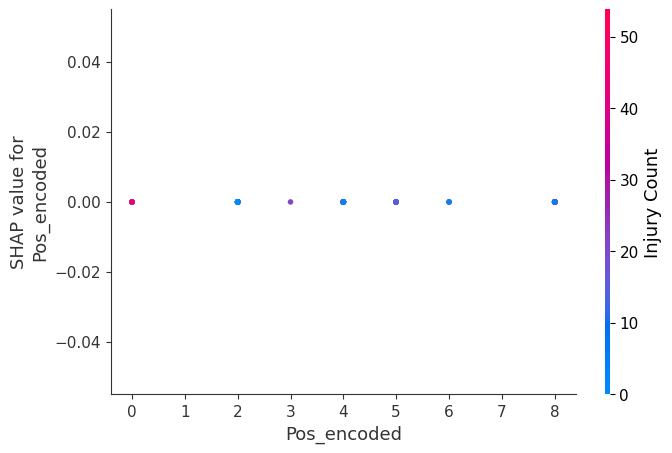

In [70]:
# Check correlation between position and injury count
shap.dependence_plot("Pos_encoded", shap_values, X_test_shap, interaction_index = "Injury Count")